# Усманова Анастасия, 674 группа

# Основные критерии оценки за задание

- аккуратность оформления работы;
- наличие выводов;
- обоснованность выбора статистических критериев, учет поправки на множественность гипотез
- в случае работы с синтетическими данными: учет неточностей, связанных со случайным порождением данных
- в случае работы с реальными данными также учитывается предобработка

In [1]:
from zlib import crc32
import numpy as np

if __name__=='__main__':
    mail = input('enter phystech e-mail\n') 
    to_hash =  mail.strip().split('@')[0]    
    h = crc32(to_hash.encode('utf-8'))
    seed = h%(2**32-1)
    rs = np.random.RandomState(seed)
    task1 = rs.randint(low=1, high=5)
    task2 = rs.randint(low=1, high=5)
    task3 = rs.randint(low=1, high=5)
    task4 = rs.randint(low=1, high=4)
    print ('Your tasks are 1.{}, 2.{}, 3.{}, 4.{}'.format(task1, task2, task3, task4))

enter phystech e-mail
usmanova.aa@phystech.edu
Your tasks are 1.1, 2.4, 3.4, 4.2


## 1.1 Проверить мощность и консервативность критериев Лиллиефорса, Харке-Бера, Шапиро-Улика для выборок из следующих распределений:

- Нормальное
- Лапласа
- Стьюдента
- Усеченное нормальное распределение (модуль каждого элемента выборки не превосходит 2)

Все предложенные критерии проверяют нормальность выборки. 

In [119]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

from statsmodels.stats.stattools import jarque_bera

np.random.seed(17)

### 1. Генерирование выборок

In [169]:
sizes = range(10, 2000, 200)
labels = ['normal', 'laplace', 'student', 'truncnorm']
def samples(size = 10):
    samples = {}
    samples['normal'] = np.random.normal(0,1, size)
    samples['laplace'] = np.random.laplace(0,1, size)
    samples['student'] = np.random.standard_t(5, size)
    samples['truncnorm'] = st.truncnorm.rvs(-2, 2,0,1, size)
    return samples

Size = 1000


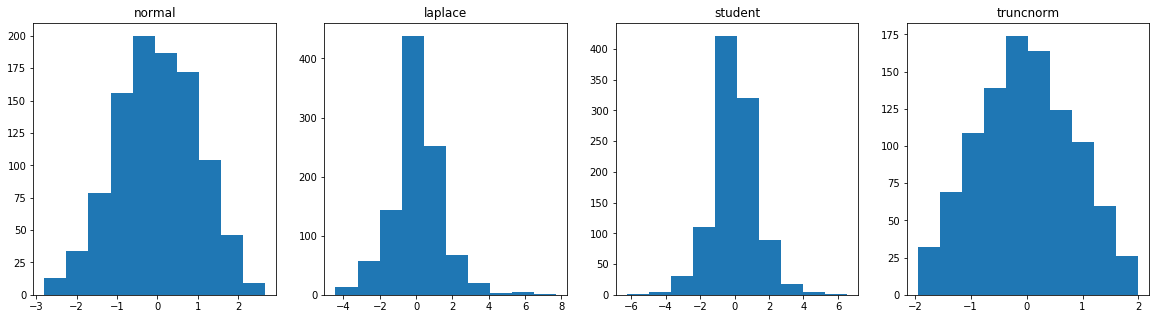

In [170]:
fig, axes = plt.subplots(1,4, figsize=(5*4, 5*1))
print('Size =', 1000)
for i, label in enumerate(labels):
    axes[i].hist(samples(1000)[label])
    axes[i].set_title(label)

In [151]:
number_exp = 100
alpha = 0.05

### 2. Критерий Лиллиефорса

In [171]:
from statsmodels.stats.diagnostic import lilliefors

In [172]:
power_lilliefors = {}   

for label0 in labels:
    power_lilliefors[label0] = []
    for size in sizes:
        mean = []
        for i in range(10):
            rejected = 0
            for i in range(number_exp):
                if lilliefors(samples(size)[label0])[1] <= alpha:
                    rejected +=1
            mean.append(rejected/number_exp)
                
        power_lilliefors[label0].append(np.mean(mean)) 

### 3. Критерий Харке-Бера

In [173]:
from statsmodels.stats.stattools import jarque_bera

In [184]:
power_jarque_bera = {}       
for label0 in labels:
    power_jarque_bera[label0] = []
    for size in sizes:
        mean = []
        for i in range(10):
            rejected = 0
            for i in range(number_exp):
                if jarque_bera(samples(size)[label0])[1] <= alpha:
                    rejected +=1
            mean.append(rejected/number_exp)
                
        power_jarque_bera[label0].append(np.mean(mean)) 

### 4. Критерий Шапиро-Улика

In [182]:
power_shapiro = {}        
for label0 in labels:
    power_shapiro[label0] = []
    for size in sizes:
        mean = []
        for i in range(10):
            rejected = 0
            for i in range(number_exp):
                if st.shapiro(samples(size)[label0])[1] <= alpha:
                    rejected +=1
            mean.append(rejected/number_exp)
                
        power_shapiro[label0].append(np.mean(mean)) 

### 5. Консервативность

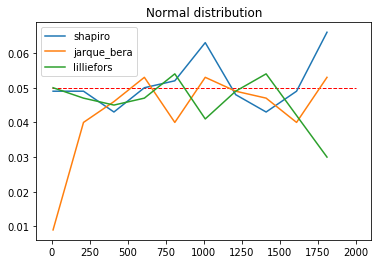

In [185]:
plt.plot(sizes, power_shapiro['normal'], label = 'shapiro')
plt.plot(sizes, power_jarque_bera['normal'], label = 'jarque_bera')
plt.plot(sizes, power_lilliefors['normal'], label = 'lilliefors')
plt.legend()
plt.hlines(0.05, 0, 2000, color = 'r',linewidth = 1, linestyle = '--')
plt.title('Normal distribution')
plt.show()

Критерий Шапиро-Уилка не является консервативным на выборках n<2000.

Критерий Харке-Бера почти консервативен при n<2000. 

Критерий Лиллиефорса почти консервативен при n<2000. 

### 6. Мощность


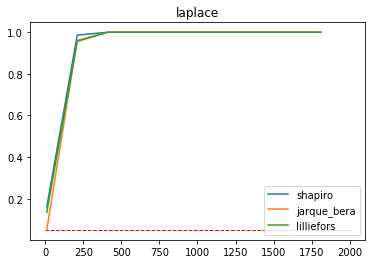

In [186]:
plt.plot(sizes, power_shapiro[labels[1]], label = 'shapiro')
plt.plot(sizes, power_jarque_bera[labels[1]], label = 'jarque_bera')
plt.plot(sizes, power_lilliefors[labels[1]], label = 'lilliefors')
plt.legend()
plt.hlines(0.05, 0, 2000, color = 'r',linewidth = 1, linestyle = '--')
plt.title(labels[1])
plt.show()

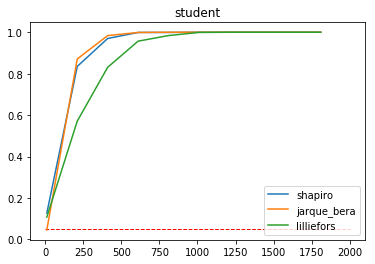

In [187]:
plt.plot(sizes, power_shapiro[labels[2]], label = 'shapiro')
plt.plot(sizes, power_jarque_bera[labels[2]], label = 'jarque_bera')
plt.plot(sizes, power_lilliefors[labels[2]], label = 'lilliefors')
plt.legend()
plt.hlines(0.05, 0, 2000, color = 'r',linewidth = 1, linestyle = '--')
plt.title(labels[2])
plt.show()

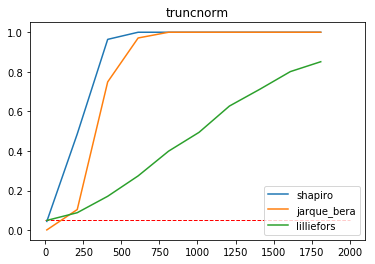

In [188]:
plt.plot(sizes, power_shapiro[labels[3]], label = 'shapiro')
plt.plot(sizes, power_jarque_bera[labels[3]], label = 'jarque_bera')
plt.plot(sizes, power_lilliefors[labels[3]], label = 'lilliefors')
plt.legend()
plt.hlines(0.05, 0, 2000, color = 'r',linewidth = 1, linestyle = '--')
plt.title(labels[3])
plt.show()

Критерий Лиллиефорса по сравнению с остальными показывает себя хуже. Он чувствителен к хвостам распределений. Особенно это видно, если рассматривать усеченное нормальное и распределение стьюдента. 
Шапиро-Уилка оказывается чуть более мощным, чем Харке-Бера.
Их мощности асимптотически стремятся к 1. 